In [1]:
# this notebook is to train the LightGBM model
import pandas as pd
import numpy as np 

In [2]:
# loading dataset
df = pd.read_csv('../data/train.csv', index_col='id')
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
5,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
6,M,0.415,0.325,0.110,0.3315,0.1655,0.0715,0.1300,9
7,F,0.610,0.490,0.150,1.1165,0.4955,0.2945,0.2950,9
8,I,0.205,0.150,0.040,0.0460,0.0145,0.0105,0.0100,4


In [4]:
# let's label the categorical features
from sklearn.preprocessing import LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [16]:
# scale the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
length_scaled = scaler.fit_transform(df[['Length', 'Diameter', 'Height']])
weight_scaled = scaler.fit_transform(df[['Whole weight', 'Whole weight.1','Whole weight.2', 'Shell weight']])


In [20]:
# let's apply pca on the data
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca2 = PCA(n_components=1)

df['length_pca'] = pca.fit_transform(length_scaled)
df['weight_pca'] = pca2.fit_transform(weight_scaled)

print(pca.explained_variance_ratio_)
print(pca2.explained_variance_ratio_)

[0.96134764]
[0.96356954]


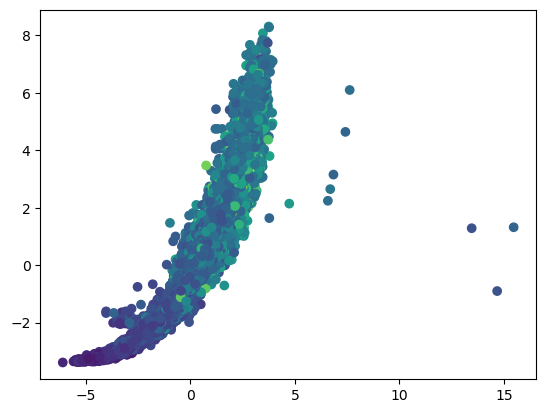

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['length_pca'], df['weight_pca'], c=df['Rings'])
plt.show()

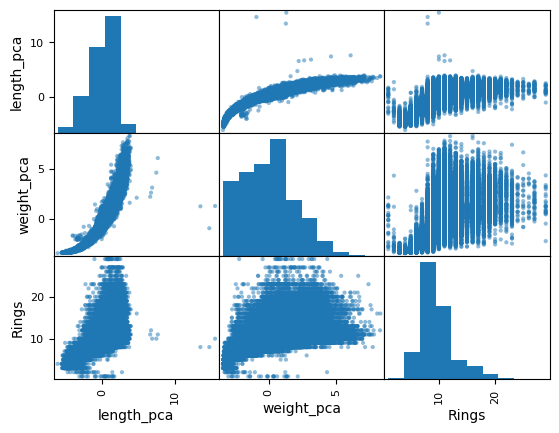

In [29]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['length_pca', 'weight_pca', 'Rings']], )
plt.show()

In [21]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,length_pca,weight_pca
id,,,,,,,,,,,
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,0.547277,-0.109501
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1.223074,1.551963
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,-5.140462,-3.331852
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,1.036263,0.494140
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.243625,-0.092588


In [22]:
# let's split model for the training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['length_pca', 'weight_pca', 'Sex']], df['Rings'], test_size=0.2, random_state=42)

# training part

In [33]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [41]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [42]:
params = {
    'objective': 'multiclass',
    'num_class': 30,
    'metric': 'multi_logloss',
    'learning_rate': 0.1,

}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

y_pred = bst.predict(X_test)

# Convert predictions to class labels
y_pred_labels = [np.argmax(pred) for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 72492, number of used features: 3
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -8.246793
[LightGBM] [Info] Start training from score -8.146709
[LightGBM] [Info] Start training from score -5.457890
[LightGBM] [Info] Start training from score -4.171935
[LightGBM] [Info] Start training from score -3.465460
[LightGBM] [Info] Start training from score -2.819527
[LightGBM] [Info] Start training from score -2.305652
[LightGBM] [Info] Start training from score -1.836618
[LightGBM] [Info] Start training from score -1.645634
[LightGBM] [Info] Start training from score -1.979892
[LightGBM] [Info] Start training from score -2.370827


# let's submit a predicted data 

In [45]:
test_df = pd.read_csv("../data/test.csv", index_col="id")
# let's label the categorical features

test_df['Sex'] = LabelEncoder().fit_transform(test_df['Sex'])
test_df.head(5)


# scale the numerical features

scaler = StandardScaler()
length_scaled = scaler.fit_transform(test_df[['Length', 'Diameter', 'Height']])
weight_scaled = scaler.fit_transform(test_df[['Whole weight', 'Whole weight.1','Whole weight.2', 'Shell weight']])

# let's apply pca on the data


pca = PCA(n_components=1)
pca2 = PCA(n_components=1)

test_df['length_pca'] = pca.fit_transform(length_scaled)
test_df['weight_pca'] = pca2.fit_transform(weight_scaled)

print(pca.explained_variance_ratio_)
print(pca2.explained_variance_ratio_)

test_df.head()

[0.95786098]
[0.96325727]


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,length_pca,weight_pca
id,,,,,,,,,,
90615,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,1.354371,2.166588
90616,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,1.016834,0.983354
90617,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0.381807,0.212010
90618,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0.924357,0.239256
90619,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,-1.349745,-1.897034


In [51]:
result = bst.predict(test_df[['length_pca', 'weight_pca', 'Sex']])

# Convert predictions to class labels
result_labels = [np.argmax(pred) for pred in result]

sub = pd.DataFrame({"id": test_df.index, "Rings": result_labels})
sub.to_csv("../submission/lightgbm_submission.csv", index=False)

In [52]:
!kaggle competitions submit -c playground-series-s4e4 -f ../submission/lightgbm_submission.csv -m "lightgbm submission"

Successfully submitted to Regression with an Abalone Dataset



  0%|          | 0.00/608k [00:00<?, ?B/s]
  1%|▏         | 8.00k/608k [00:00<00:45, 13.6kB/s]
 78%|███████▊  | 472k/608k [00:00<00:00, 906kB/s]  
100%|██████████| 608k/608k [00:03<00:00, 166kB/s]
